# Imports

In [1]:
# -----------------------------------------------------
# Change working directory to src
import os
import sys
import torch

from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table

working_dir = os.path.realpath(os.path.join(os.getcwd(), "../src/"))
os.chdir(working_dir)

metric_path = os.path.join(working_dir)
sys.path.append(metric_path)

print("Current working directory:", os.getcwd())
# -----------------------------------------------------

Current working directory: /Users/yowal8386/Library/CloudStorage/OneDrive-UiTOffice365/Documents/PhD/code/MI_Across_Space_and_Time/FlatlandandBeyond/GeometriclyAgnosticEvaluation/src


In [2]:
from agnostic_metrics import *

/opt/anaconda3/envs/FlatlandAndBeyond/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Initializations

In [3]:
labels = torch.load("../../Embeddings/labels.pt")
euclidean_embeddings = torch.load("../../Embeddings/E-VAE_MNIST_embeddings.pt")
lorentz_embeddings = torch.load("../../Embeddings/L-VAE_MNIST_embeddings.pt")

/var/folders/0f/tc2j3gn55c16cxfr0htyrvqm0000gp/T/ipykernel_2896/1173586016.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load("../../Embeddings/labels.p

In [4]:
# Count frequency of each unique element
unique, counts = torch.unique(labels, return_counts=True)

# Display the result
for val, count in zip(unique, counts):
    print(f"Value {val.item()} occurs {count.item()} times.")

Value 0 occurs 980 times.
Value 1 occurs 1135 times.
Value 2 occurs 1032 times.
Value 3 occurs 1010 times.
Value 4 occurs 982 times.
Value 5 occurs 892 times.
Value 6 occurs 958 times.
Value 7 occurs 1028 times.
Value 8 occurs 974 times.
Value 9 occurs 1009 times.


# Calculate distances between all points

## Euclidean distance

In [5]:
euclidean_pairwise_distance = get_pairwise_euclidean_distance(euclidean_embeddings)

## lorentzian distance

In [6]:
lorentz_pairwise_distance = get_pairwise_lorentz_distance(lorentz_embeddings, -1)

NaNs? False
Negative values? False
Symmetric? True


## Poincaré distance

In [7]:
poincare_embeddings = lorentz_to_poincare(lorentz_embeddings)

In [8]:
poincare_pairwise_distance = get_pairwise_poincare_distance(poincare_embeddings)

## Normalise Distances

In [9]:
normalised_lorentz_pairwise_distance = normalise_distances(lorentz_pairwise_distance)
normalised_poincare_pairwise_distance = normalise_distances(poincare_pairwise_distance)
normalised_euclidean_pairwise_distance = normalise_distances(euclidean_pairwise_distance)

# UMAP using Calculated Distance

## Euclidean UMAP

In [10]:
get_UMAP(normalised_euclidean_pairwise_distance, labels=labels, space="E")

/opt/anaconda3/envs/FlatlandAndBeyond/lib/python3.8/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/anaconda3/envs/FlatlandAndBeyond/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Lorentz UMAP

In [ ]:
get_UMAP(normalised_lorentz_pairwise_distance, labels=labels, space="L", k=-1)

/opt/anaconda3/envs/hcnn/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



## Poincaré UMAP

In [ ]:
#This isn't a real Poincaré embedding just the projection of Lorentz embeddings on the Poincaré Ball just to show an example of how to use the UMAP function with Poincaré embeddings
get_UMAP(normalised_poincare_pairwise_distance, space="P")

/opt/anaconda3/envs/hcnn/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



# KNN using calculated distance

## Euclidean kNN

In [ ]:
knn, test_labels, euclidean_predicted_labels = get_knn(k=5, embeddings=normalised_euclidean_pairwise_distance, labels=labels, n_test= 5000)

Accuracy on 5000 test samples using k-NN (k=5): 0.7822
Adjusted Rand Index: 0.647


## Lorentz kNN

In [ ]:
knn, test_labels, lorentz_predicted_labels = get_knn(k=5, embeddings=normalised_lorentz_pairwise_distance, labels=labels, n_test= 5000)

Accuracy on 5000 test samples using k-NN (k=5): 0.8212
Adjusted Rand Index: 0.698


# Mutual Information

## Normal labels categorical distance

In [ ]:
# 0 if labels are the same, 1 if they are different
labels_distance = compute_categorical_distance(labels.cpu().numpy(), discrete_dist=1)

## Hierarchal labels categorical distance

In [ ]:
# # 1 for each step to reach same parent (LCA) in the hierarchy, 0 if they are the same (cannot be tested with MNIST)
# hierarchical_distance_matrix = compute_fast_hierarchical_distance_matrix(encoded_paths)
# hierarchical_distance_matrix = torch.tensor(hierarchical_distance_matrix, dtype=torch.float32)

Computing Distance Matrix: 100%|██████████| 16971/16971 [00:48<00:00, 353.42it/s] 


In [ ]:
distances = np.concatenate([normalised_lorentz_pairwise_distance.cpu().numpy()[None, :, :], 
                           normalised_euclidean_pairwise_distance.cpu().numpy()[None, :, :],
                           labels_distance[None, :, :],],
                        #    normalised_hierarchical_distance[None, :, :],],
                           axis=0)
print("Combined distance matrix shape:", distances.shape)

Combined distance matrix shape: (3, 10000, 10000)


## Results

In [ ]:
print("Mutual Information between Euclidean and Lorentz Embeddings", cmi([0],[1],[], 5, distances, precomputed=True))

100%|██████████| 10000/10000 [00:05<00:00, 1764.97it/s]

Mutual Information between Euclidean and Lorentz Embeddings 4.019751432318907


In [ ]:
print("Conditional Mutual Information between Classes and Lorentz Embeddings given the Euclidean Embeddings", cmi([0],[2],[1], 5, distances, precomputed=True))

100%|██████████| 10000/10000 [00:03<00:00, 2559.79it/s]

Conditional Mutual Information between Classes and Lorentz Embeddings given the Euclidean Embeddings 0.16454534362928497


# McNemar test

In [ ]:
print("McNemar's test")
table = mcnemar_table(y_target=test_labels.cpu().numpy(), y_model1=lorentz_predicted_labels, y_model2=euclidean_predicted_labels)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}")
table

McNemar's test
chi² statistic: 43.01257142857143, p-value: 5.438924759960044e-11


array([[3571,  535],
       [ 340,  554]])

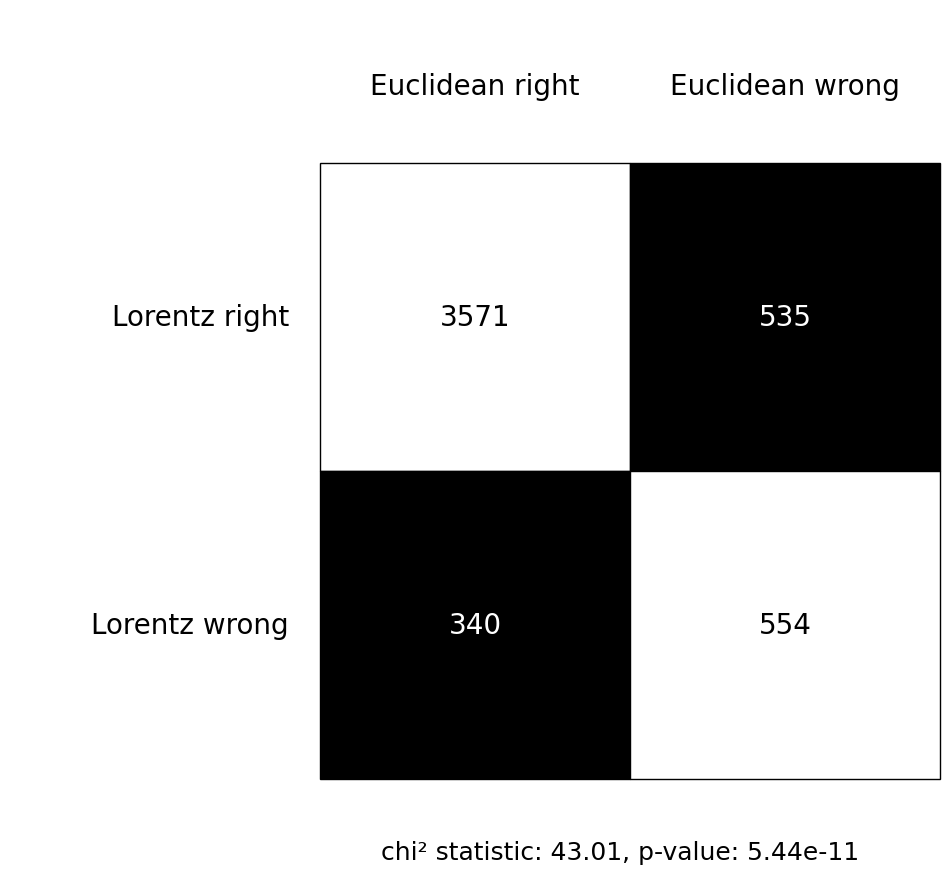

In [ ]:
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

brd = checkerboard_plot(table,
                        figsize=(8, 8),
                        fmt='%d',
                        col_labels=['Euclidean right', 'Euclidean wrong'],
                        row_labels=['Lorentz right', 'Lorentz wrong'],
                        fontsize=20)
caption = f"chi² statistic: {chi2_:.2f}, p-value: {p:.2e}"
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=18)
plt.show()